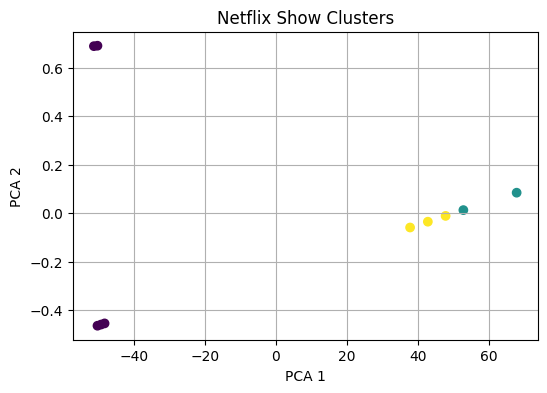

In [3]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
df = pd.read_csv('netflix_titles.csv')

# Step 2: Preprocess data
df.dropna(inplace=True)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# Step 3: One-hot encode categorical columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['type', 'main_genre']]).toarray()

# Step 4: Combine features
X = np.concatenate([encoded, df[['duration_num']].values], axis=1)

# Step 5: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 6: Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Netflix Show Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Step 7: Save result
df.to_csv('clustered_shows.csv', index=False)
